In [1]:
import pandas as pd
data = pd.read_csv('C:/Users/hp/Desktop/prj_pfe_inwi/ma_data_louvain1.csv') 
data.columns

Index(['dn', 'contract_id', 'produit', 'full_vol', 'full_secteur', 'full_city',
       'source', 'unit', 'a_own', 'b_number', 'duration', 'num_interactions',
       'num_interactions_sms', 'offnet', 'communaute', 'duration_wh',
       'num_interactions_wh', 'num_interactions_sms_wh'],
      dtype='object')

In [2]:
# Filtrer les colonnes catégorielles de type 'object'
colonnes_categorielles = data.select_dtypes(include=['object'])
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for colonne in colonnes_categorielles.columns:
    # Encoder la variable catégorielle
    encoded_variable = label_encoder.fit_transform(data[colonne])
    # Assigner les valeurs encodées à la colonne correspondante dans la dataframe
    data[colonne] = encoded_variable

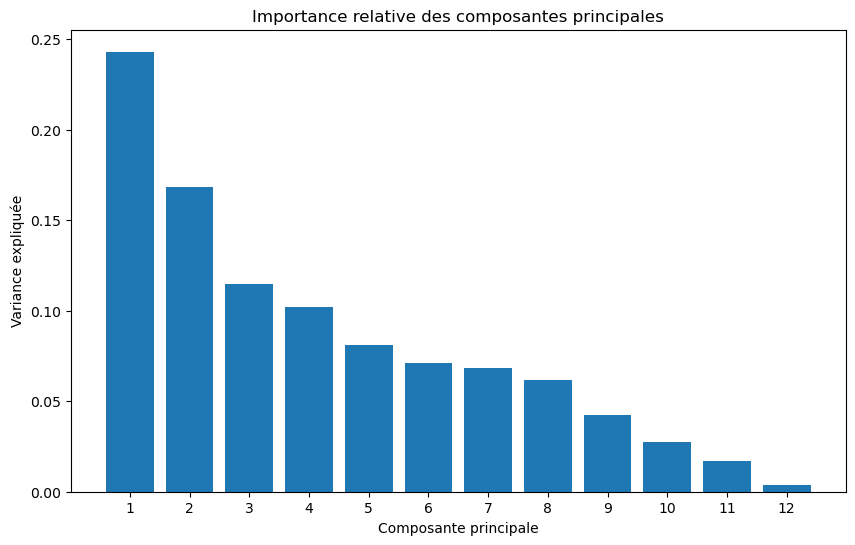

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Supposons que votre DataFrame s'appelle 'data' et vous avez déjà ajouté la colonne 'cluster'
# et effectué le K-means clustering

# Sélectionner les caractéristiques pour l'analyse
cluster_features = ['duration_wh', 'num_interactions_wh', 'num_interactions_sms_wh','produit','full_vol', 'full_secteur', 'full_city', 'source', 'duration', 'num_interactions', 'num_interactions_sms', 'communaute']
cluster_data = data[cluster_features]

# Standardiser les données avant l'analyse
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Appliquer l'analyse de composantes principales (PCA)
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Créer un graphique montrant l'importance relative des composantes principales
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_var_ratio) + 1), explained_var_ratio, align='center')
plt.xticks(range(1, len(explained_var_ratio) + 1))
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée')
plt.title('Importance relative des composantes principales')
plt.show()


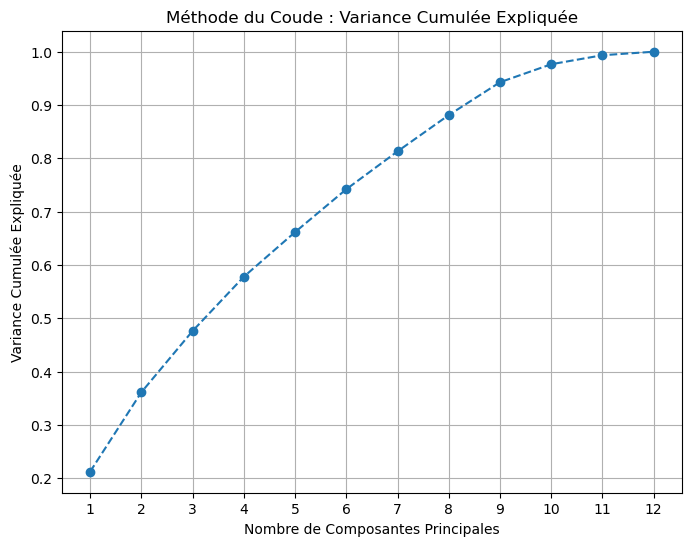

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Sélectionner uniquement les colonnes pertinentes pour PCA
columns_to_keep = ['duration_wh', 'num_interactions_wh', 'num_interactions_sms_wh','produit','full_vol', 'full_secteur', 'full_city', 'source', 'a_own','num_interactions', 'num_interactions_sms', 'communaute']
data_subset = data[columns_to_keep]

# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)

# Appliquer PCA
pca = PCA()
pca.fit(scaled_data)

# Calculer les valeurs propres et la variance cumulée
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Tracer le graphique de la variance cumulée
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Méthode du Coude : Variance Cumulée Expliquée")
plt.xlabel("Nombre de Composantes Principales")
plt.ylabel("Variance Cumulée Expliquée")
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)
plt.show()


In [5]:
print('explained_variance_ratio=',explained_variance_ratio)
print('cumulative_variance=',cumulative_variance)

explained_variance_ratio= [0.21232917 0.14896728 0.11494218 0.10171423 0.08371401 0.08042881
 0.07101955 0.06805451 0.06161191 0.03375374 0.01690523 0.0065594 ]
cumulative_variance= [0.21232917 0.36129644 0.47623862 0.57795285 0.66166686 0.74209566
 0.81311521 0.88116972 0.94278163 0.97653537 0.9934406  1.        ]


In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Supposons que vous avez déjà chargé vos données dans un DataFrame appelé 'data'
columns_to_keep = ['produit','duration_wh', 'num_interactions_wh', 'num_interactions_sms_wh', 'full_vol', 'full_secteur', 'full_city', 'source','duration', 'num_interactions', 'num_interactions_sms', 'communaute']

# Sélectionner uniquement les colonnes que vous souhaitez utiliser pour PCA
data_subset = data[columns_to_keep]

# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)

# Appliquer PCA
num_components = 8  
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(scaled_data)

# Créer un DataFrame pour stocker les composantes principales
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(num_components)])

# Concaténer les composantes principales avec les colonnes non incluses dans PCA
final_df = pd.concat([principal_df, data.drop(columns=columns_to_keep)], axis=1)
explained_variance_ratio = pca.explained_variance_ratio_
print("Pourcentage de variance expliquée par chaque composante:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.2%}")

# Calculer la variance cumulée expliquée
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Afficher la variance cumulée expliquée
print("\nVariance cumulée expliquée par les composantes principales:")
for i, cumulative_ratio in enumerate(cumulative_variance_ratio):
    print(f"PC{i+1}: {cumulative_ratio:.2%}")
# Afficher les résultats
print(final_df.head())


Pourcentage de variance expliquée par chaque composante:
PC1: 24.30%
PC2: 16.84%
PC3: 11.49%
PC4: 10.18%
PC5: 8.09%
PC6: 7.11%
PC7: 6.81%
PC8: 6.16%

Variance cumulée expliquée par les composantes principales:
PC1: 24.30%
PC2: 41.14%
PC3: 52.64%
PC4: 62.82%
PC5: 70.91%
PC6: 78.02%
PC7: 84.83%
PC8: 90.99%
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.015900  0.464627 -1.040627  0.563604 -1.056837 -0.950426 -0.423440   
1 -1.966380  2.303738 -1.109330 -0.078664 -1.019219  0.716035  0.682130   
2 -0.830307 -0.056918 -1.404001  1.140726 -1.375863 -0.649176  0.165724   
3  1.752862 -0.400240  0.174699 -0.660414 -1.152356 -0.330434  0.203023   
4 -1.851352 -0.076758 -0.043581  0.726410 -1.047382 -0.144935 -1.879855   

        PC8     dn  contract_id  unit  a_own  b_number  offnet  
0  0.594878  25700         8070     1   True     19670       0  
1 -0.074070   4588         9352     1   True     28930       1  
2  0.286588   2314        18177     1   True    

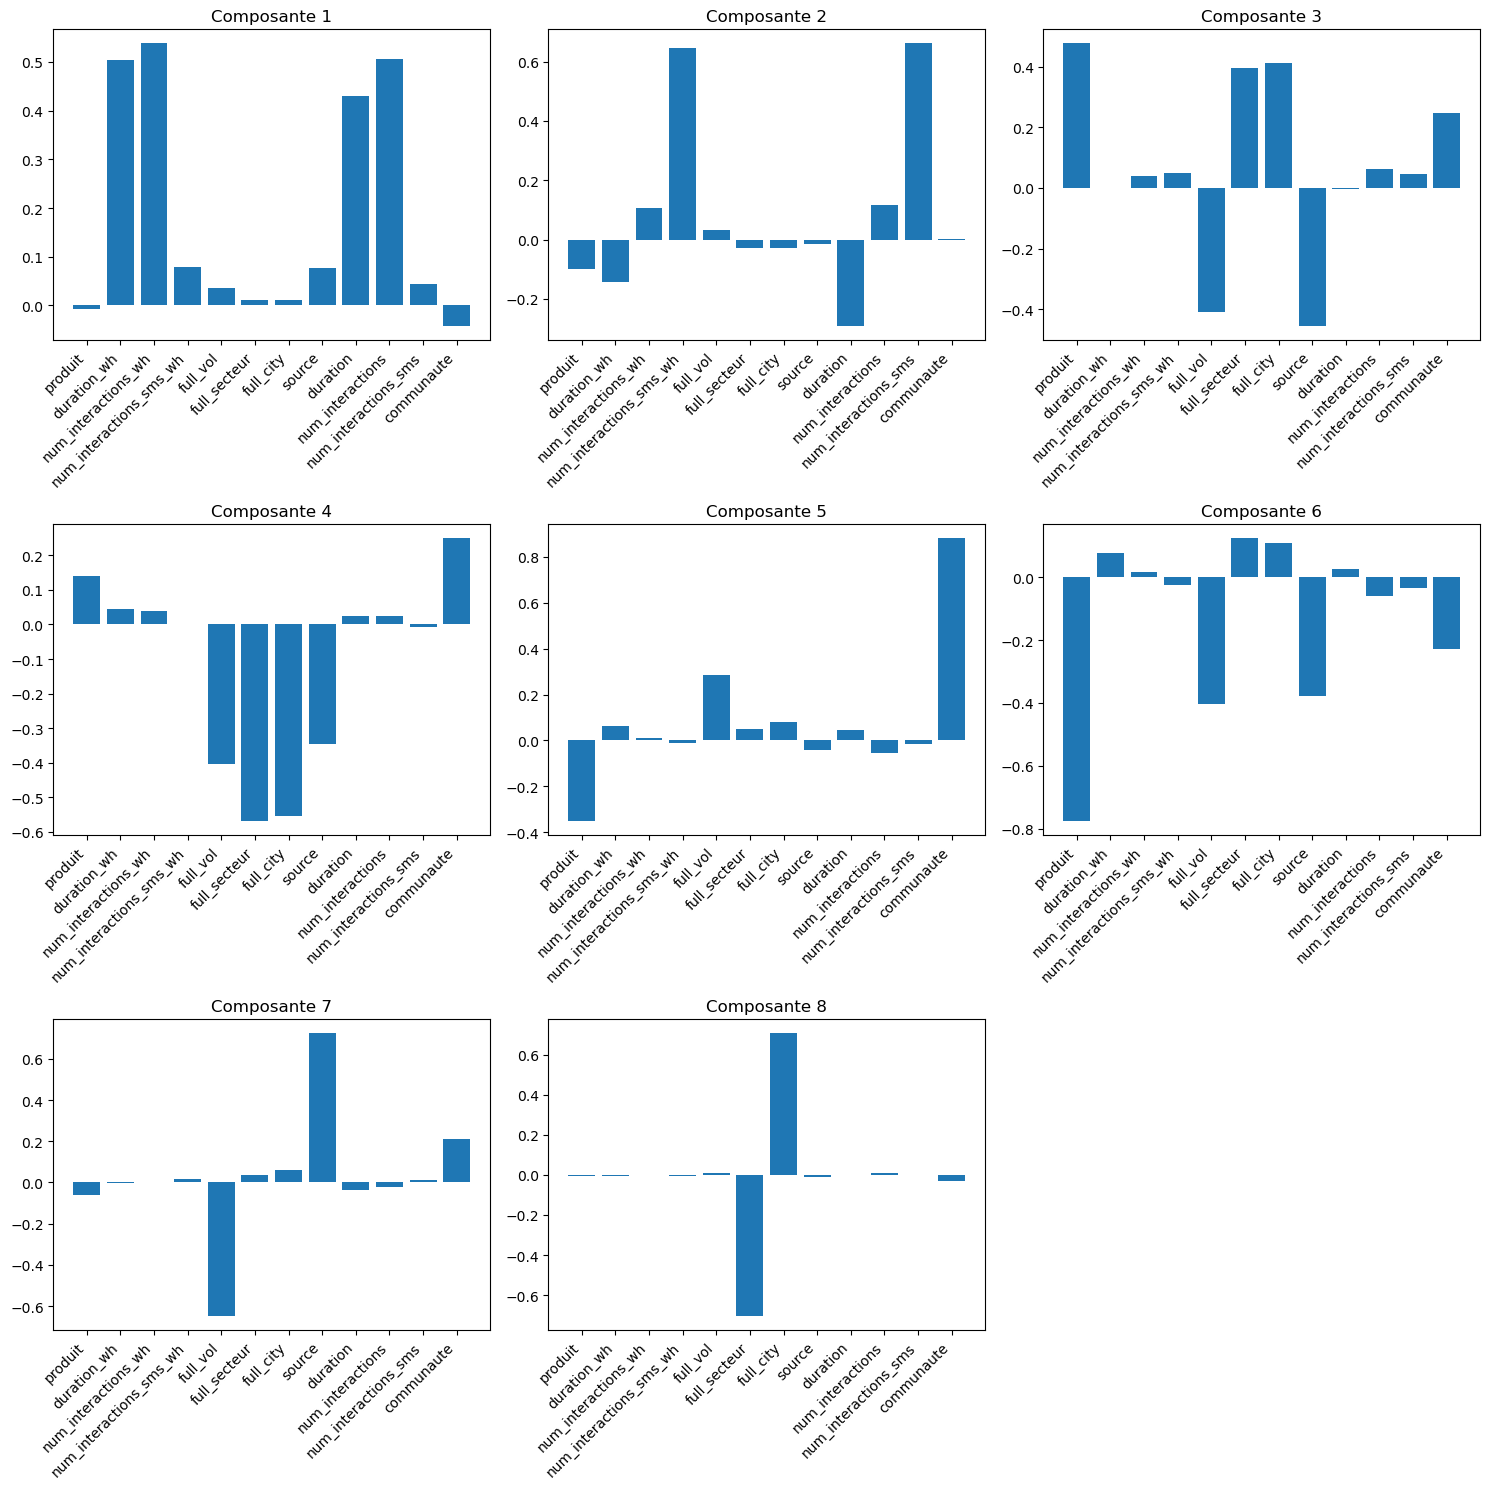

In [9]:
import matplotlib.pyplot as plt

# Récupérer les charges factorielles des variables sur les composantes principales
loadings = pca.components_

# Calculer le nombre de lignes et de colonnes pour la disposition des sous-graphiques
num_components = len(loadings)
num_rows = (num_components + 2) // 3  # Arrondi supérieur
num_cols = min(num_components, 3)

# Créer une figure pour les graphiques de charges factorielles
plt.figure(figsize=(15, 5 * num_rows))  # Ajustez la taille de la figure selon vos besoins

# Parcourir chaque composante principale
for i, component in enumerate(loadings):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.bar(range(len(columns_to_keep)), component)
    plt.xticks(range(len(columns_to_keep)), columns_to_keep, rotation=45, ha="right")
    plt.title(f'Composante {i+1}')

plt.tight_layout()
plt.show()


In [10]:
data=final_df
data.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'dn',
       'contract_id', 'unit', 'a_own', 'b_number', 'offnet'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

# Récupérer les charges factorielles des variables sur les composantes principales
loadings = pca.components_

# Liste des noms de colonnes à conserver
columns_to_keep = [...]  # Remplacez ceci par vos noms de colonnes

# Calculer le nombre de lignes et de colonnes pour la disposition des sous-graphiques
num_components = len(loadings)
num_plots_per_row = 2
num_rows = (num_components + num_plots_per_row - 1) // num_plots_per_row
num_cols = min(num_components, num_plots_per_row)

# Créer une figure pour les graphiques de charges factorielles
plt.figure(figsize=(15, 5 * num_rows))  # Ajustez la taille de la figure selon vos besoins

# Parcourir chaque composante principale
for i, component in enumerate(loadings):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.bar(range(len(columns_to_keep)), component)
    plt.xticks(range(len(columns_to_keep)), columns_to_keep, rotation=45, ha="right")
    plt.title(f'Composante {i+1}')

    # Si nous avons atteint le nombre maximal de graphiques par ligne, passez à la ligne suivante
    if (i + 1) % num_plots_per_row == 0 or i == num_components - 1:
        plt.tight_layout()
        plt.show()
        if i != num_components - 1:
            plt.figure(figsize=(15, 5 * num_rows))  # Créer une nouvelle figure



C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

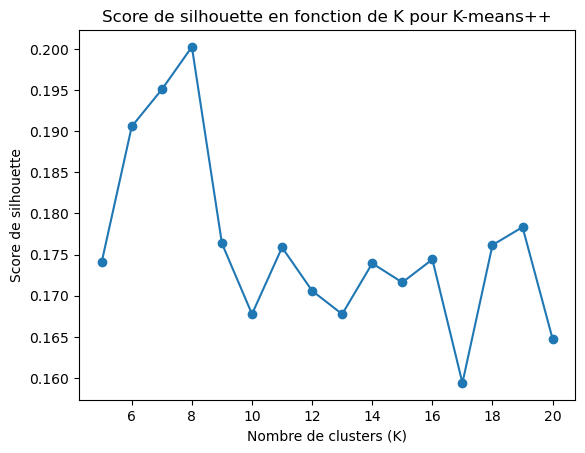

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Sélection des colonnes pertinentes
selected_columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6', 'PC7', 'PC8']

# Extraction des données à partir des colonnes sélectionnées
X = data[selected_columns]

# Définition des valeurs de K que nous voulons tester
k_values = range(5, 21)

# Liste pour stocker les scores des silhouettes pour chaque K
silhouette_scores = []

# Boucle sur les différentes valeurs de K
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Tracé des scores des silhouettes en fonction de K
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction de K pour K-means++')
plt.show()


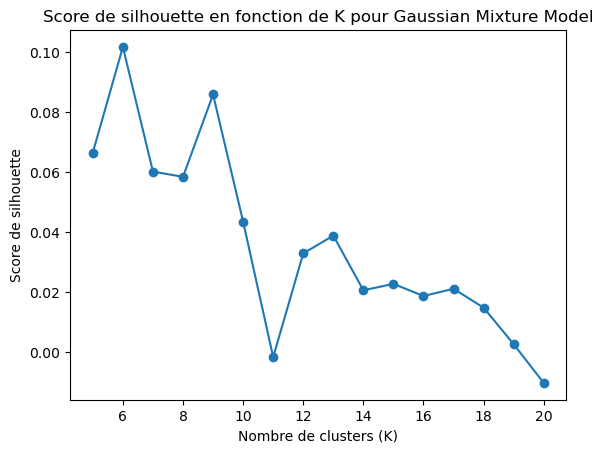

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Sélection des colonnes pertinentes
selected_columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']

# Extraction des données à partir des colonnes sélectionnées
X = data[selected_columns]

# Définition des valeurs de K que nous voulons tester
k_values = range(5, 21)

# Liste pour stocker les scores des silhouettes pour chaque K
silhouette_scores = []

# Boucle sur les différentes valeurs de K
for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=0)
    labels = gmm.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Tracé des scores des silhouettes en fonction de K
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction de K pour Gaussian Mixture Model')
plt.show()


In [ ]:
k

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

features =['PC1', 'PC2', 'PC3', 'PC4','PC6', 'PC7', 'PC8']
# Nombre de clusters souhaités
num_clusters = 8

# Créer un modèle KMeans avec seeding K-means++
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)

# Appliquer le clustering sur les données
data['cluster'] = kmeans.fit_predict(data[features])


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


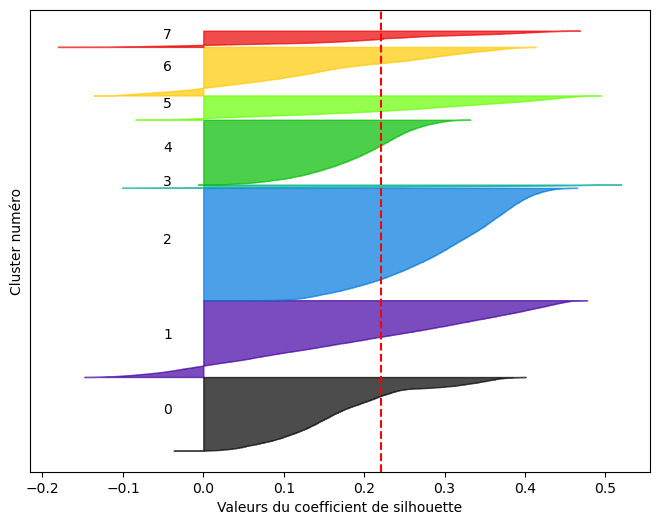

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

'''# Calcul du score de silhouette pour l'ensemble des données
silhouette_avg = silhouette_score(data[features], data['cluster'])
print("Le score de silhouette moyen est :", silhouette_avg)'''

# Calcul des scores de silhouette pour chaque point de données
sample_silhouette_values = silhouette_samples(data[features], data['cluster'])

# Création d'un graphique en barres pour afficher les scores de silhouette
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(num_clusters):
    # Regroupez les scores de silhouette pour chaque cluster et triez-les
    ith_cluster_silhouette_values = sample_silhouette_values[data['cluster'] == i]
    ith_cluster_silhouette_values.sort()

    # Calculez la hauteur de la barre
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Remplissez le graphique en barres
    color = plt.cm.nipy_spectral(float(i) / num_clusters)
  
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Étiquette pour les clusters
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcul de la prochaine position y_lower pour le prochain graphique
    y_lower = y_upper + 10

plt.xlabel("Valeurs du coefficient de silhouette")
plt.ylabel("Cluster numéro")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")  # Ligne verticale pour le score de silhouette moyen
plt.yticks([])  # Supprimer les numéros de cluster (facultatif)
plt.show()

In [19]:
print("Le score de silhouette moyen est :", silhouette_avg)

Le score de silhouette moyen est : 0.22050249648900702


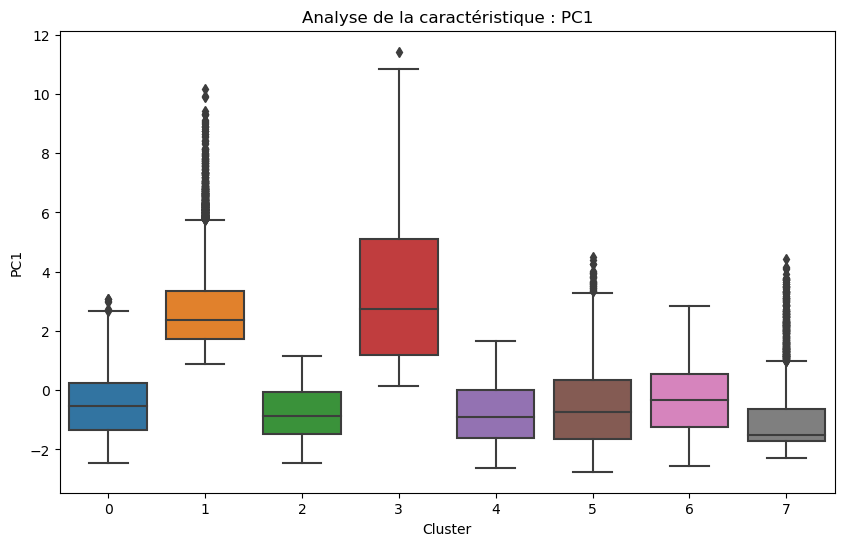

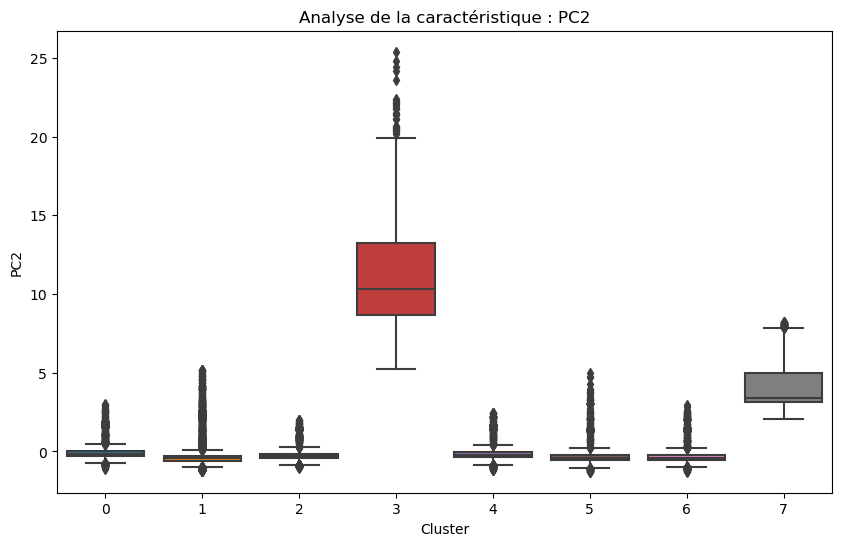

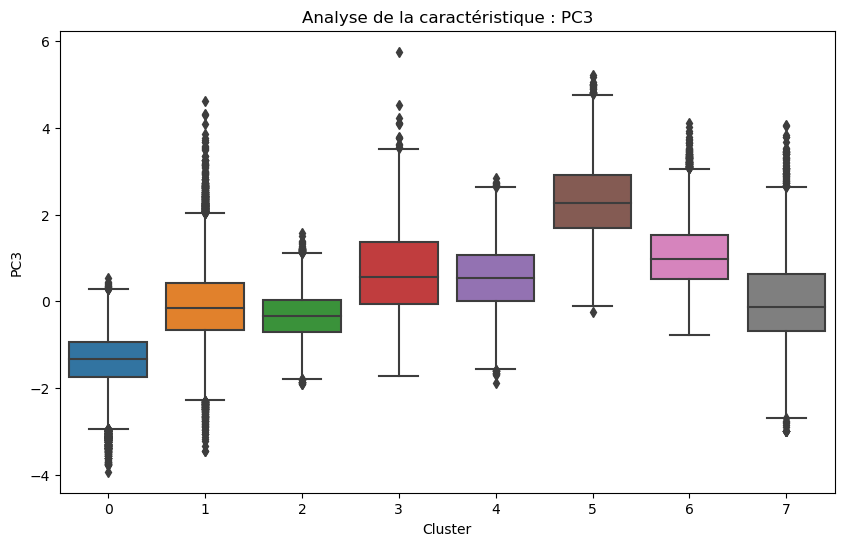

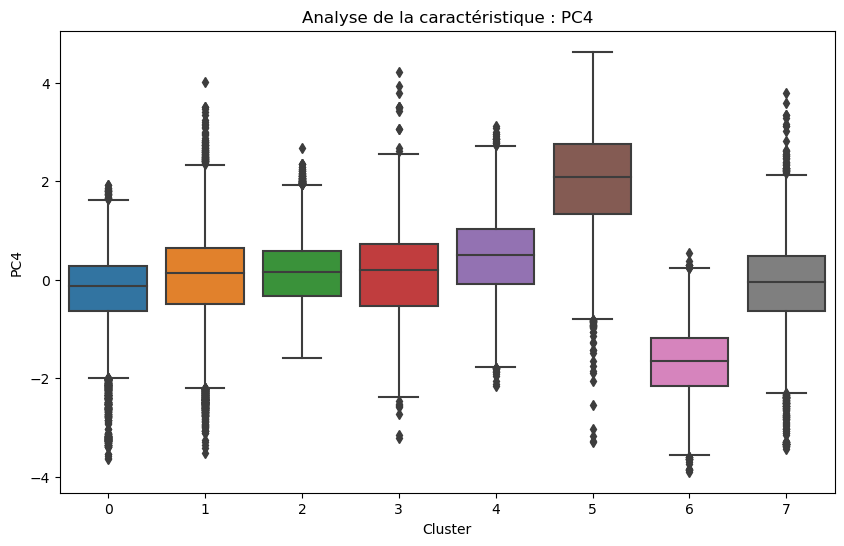

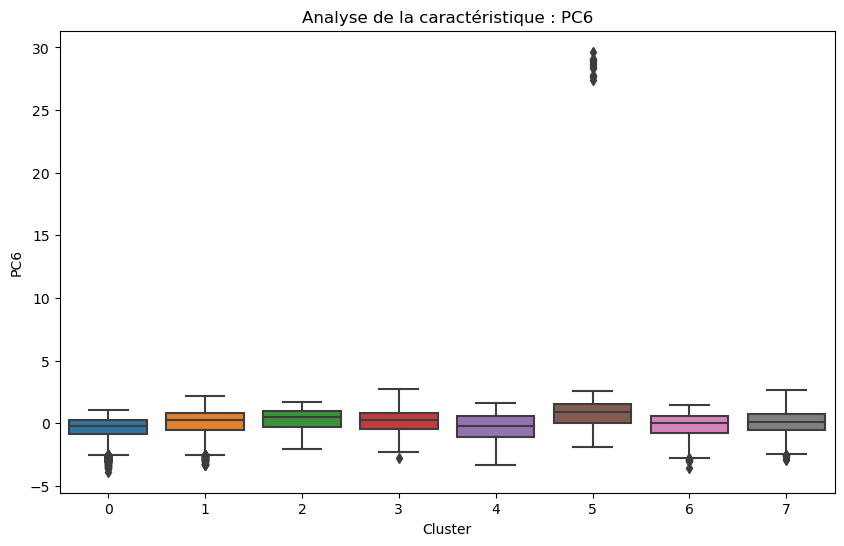

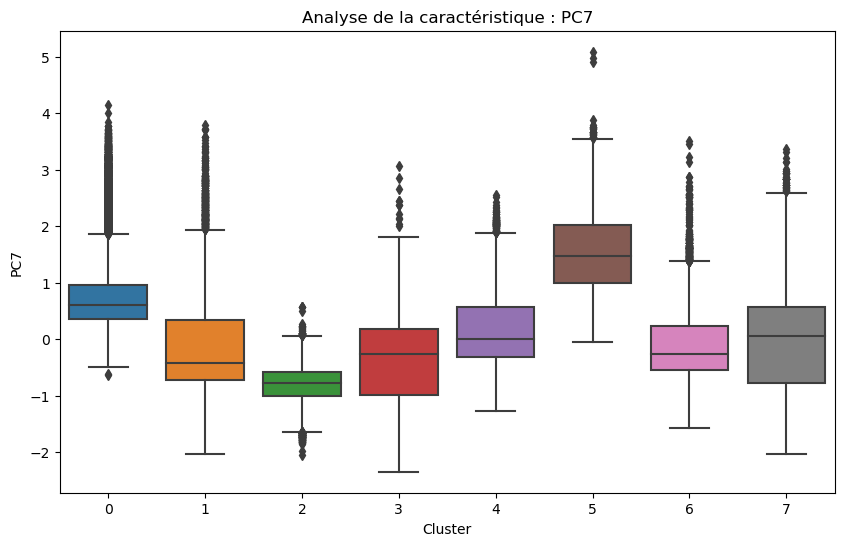

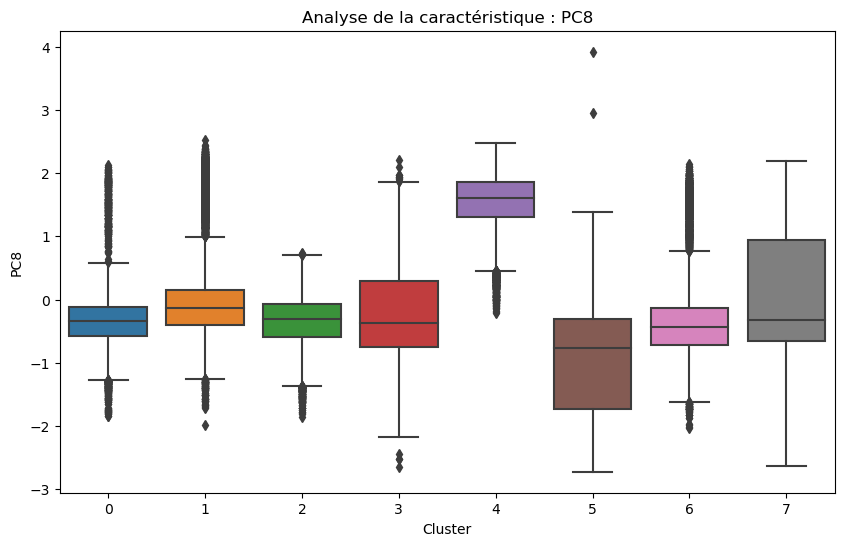

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle 'data' et vous avez déjà ajouté la colonne 'cluster'
# et effectué le K-means clustering

# Créer un sous-ensemble de données avec seulement les caractéristiques utilisées pour le clustering
cluster_features = ['PC1', 'PC2', 'PC3', 'PC4','PC6', 'PC7', 'PC8']
cluster_data = data[cluster_features + ['cluster']]

# Créer des graphiques pour chaque caractéristique
for feature in cluster_features:
    plt.figure(figsize=(10, 6))
    
    # Utiliser Seaborn pour créer un graphique de boîte à moustaches par caractéristique
    sns.boxplot(x='cluster', y=feature, data=cluster_data)
    
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.title(f'Analyse de la caractéristique : {feature}')
    
    plt.show()


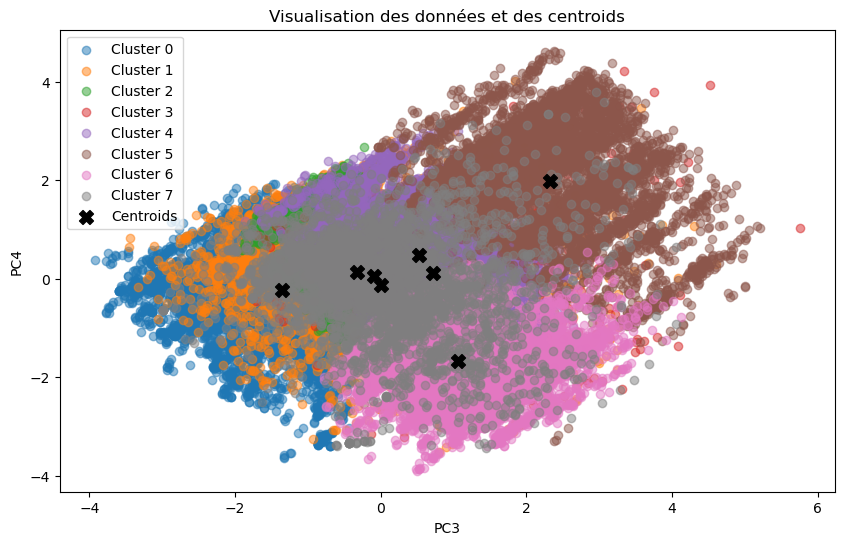

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
df=data
# Supposons que votre DataFrame s'appelle 'data' et vous avez déjà ajouté la colonne 'cluster'
# et effectué le K-means clustering

# Calculer les centroids pour chaque cluster
centroids = df.groupby('cluster').mean()

# Créer un diagramme de dispersion pour visualiser les données et les centroids
plt.figure(figsize=(10, 6))
df=data
# Afficher les données de chaque cluster avec des couleurs différentes
for cluster_id in range(len(centroids)):
    cluster_data = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_data['PC3'], cluster_data['PC4'], label=f'Cluster {cluster_id}', alpha=0.5)

# Afficher les centroids avec des couleurs différentes
plt.scatter(centroids['PC3'], centroids['PC4'], color='black', marker='X', s=100, label='Centroids')

# Ajouter des étiquettes et une légende
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.title('Visualisation des données et des centroids')
plt.legend()

# Afficher le graphique
plt.show()


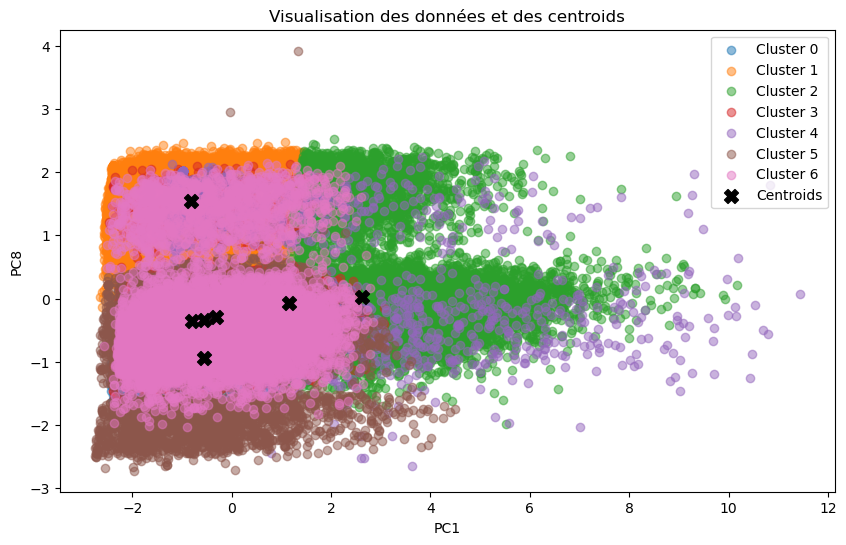

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Supposons que votre DataFrame s'appelle 'data' et vous avez déjà ajouté la colonne 'cluster'
# et effectué le K-means clustering

# Calculer les centroids pour chaque cluster
centroids = df.groupby('cluster').mean()

# Créer un diagramme de dispersion pour visualiser les données et les centroids
plt.figure(figsize=(10, 6))

# Afficher les données de chaque cluster avec des couleurs différentes
for cluster_id in range(len(centroids)):
    cluster_data = df[df['cluster'] == cluster_id]
    plt.scatter(cluster_data['PC1'], cluster_data['PC8'], label=f'Cluster {cluster_id}', alpha=0.5)

# Afficher les centroids avec des couleurs différentes
plt.scatter(centroids['PC1'], centroids['PC8'], color='black', marker='X', s=100, label='Centroids')

# Ajouter des étiquettes et une légende
plt.xlabel('PC1')
plt.ylabel('PC8')
plt.title('Visualisation des données et des centroids')
plt.legend()

# Afficher le graphique
plt.show()


In [43]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances


# Sélectionnez les colonnes de vos caractéristiques (attributs)
features = df.drop('cluster', axis=1)

# Sélectionnez la colonne de clusters
clusters = df['cluster']

# Calculer les centroïdes de chaque cluster
centroids = features.groupby(clusters).mean()

# Calculer les distances entre chaque point et le centroïde de son cluster
distances = pairwise_distances(features, centroids, metric='euclidean')

# Calculer le WCSS en prenant la somme des carrés des distances
wcss = np.sum(distances**2)

print("WCSS:", wcss)


WCSS: 658598953184123.9


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

features =['PC1', 'PC2', 'PC3', 'PC4','PC6', 'PC7', 'PC8']
# Nombre de clusters souhaités
num_clusters = 7

# Créer un modèle KMeans avec seeding K-means++
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)

# Appliquer le clustering sur les données
df['cluster'] = kmeans.fit_predict(df[features])


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Le score de silhouette moyen est : 0.21389883915614658


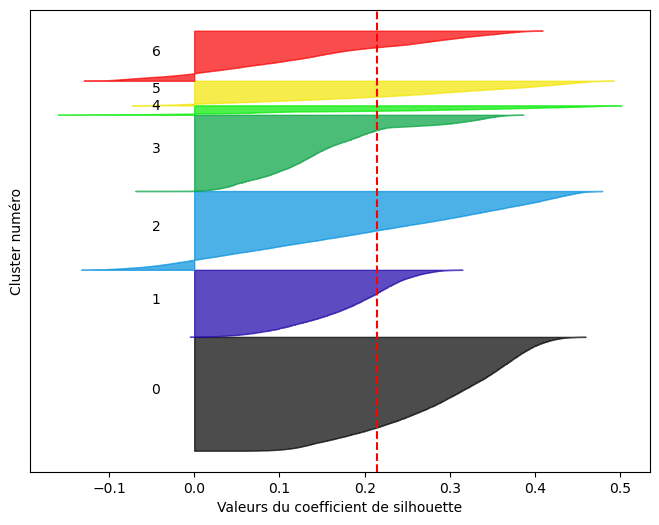

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcul du score de silhouette pour l'ensemble des données
silhouette_avg = silhouette_score(df[features], df['cluster'])
print("Le score de silhouette moyen est :", silhouette_avg)

# Calcul des scores de silhouette pour chaque point de données
sample_silhouette_values = silhouette_samples(df[features], df['cluster'])

# Création d'un graphique en barres pour afficher les scores de silhouette
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(num_clusters):
    # Regroupez les scores de silhouette pour chaque cluster et triez-les
    ith_cluster_silhouette_values = sample_silhouette_values[df['cluster'] == i]
    ith_cluster_silhouette_values.sort()

    # Calculez la hauteur de la barre
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Remplissez le graphique en barres
    color = plt.cm.nipy_spectral(float(i) / num_clusters)
  
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Étiquette pour les clusters
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcul de la prochaine position y_lower pour le prochain graphique
    y_lower = y_upper + 10

plt.xlabel("Valeurs du coefficient de silhouette")
plt.ylabel("Cluster numéro")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")  # Ligne verticale pour le score de silhouette moyen
plt.yticks([])  # Supprimer les numéros de cluster (facultatif)
plt.show()

In [5]:
data=final_df
data.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'dn',
       'contract_id', 'unit', 'a_own', 'b_number', 'offnet'],
      dtype='object')

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

features =['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6', 'PC7', 'PC8']
# Nombre de clusters souhaités
num_clusters = 8

# Créer un modèle KMeans avec seeding K-means++
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)

# Appliquer le clustering sur les données
data['cluster'] = kmeans.fit_predict(data[features])


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Le score de silhouette moyen est : 0.20022884960961815


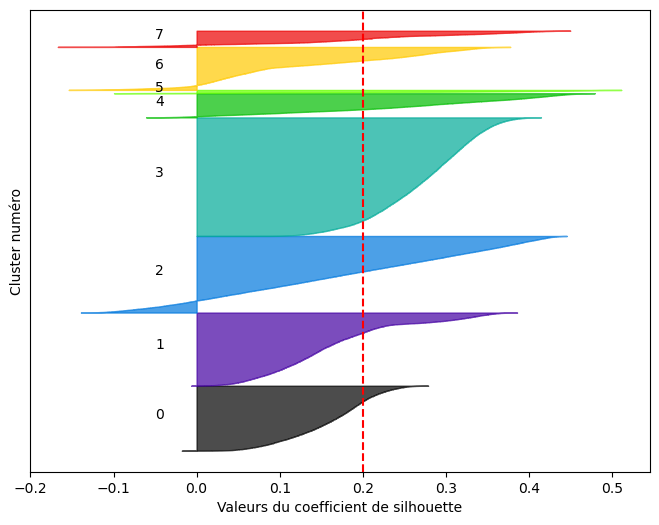

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcul du score de silhouette pour l'ensemble des données
silhouette_avg = silhouette_score(data[features], data['cluster'])
print("Le score de silhouette moyen est :", silhouette_avg)

# Calcul des scores de silhouette pour chaque point de données
sample_silhouette_values = silhouette_samples(data[features], data['cluster'])

# Création d'un graphique en barres pour afficher les scores de silhouette
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(num_clusters):
    # Regroupez les scores de silhouette pour chaque cluster et triez-les
    ith_cluster_silhouette_values = sample_silhouette_values[data['cluster'] == i]
    ith_cluster_silhouette_values.sort()

    # Calculez la hauteur de la barre
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Remplissez le graphique en barres
    color = plt.cm.nipy_spectral(float(i) / num_clusters)
  
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Étiquette pour les clusters
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcul de la prochaine position y_lower pour le prochain graphique
    y_lower = y_upper + 10

plt.xlabel("Valeurs du coefficient de silhouette")
plt.ylabel("Cluster numéro")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")  # Ligne verticale pour le score de silhouette moyen
plt.yticks([])  # Supprimer les numéros de cluster (facultatif)
plt.show()

In [10]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import numpy as np

# Charger vos données depuis le fichier ou la source appropriée
# data = pd.read_csv('votre_fichier.csv')

# Sélectionner les colonnes pertinentes pour le clustering
X = data[['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6', 'PC7', 'PC8']]

# Récupérer les étiquettes de cluster à partir de la colonne existante
cluster_labels = data['cluster']

# Calculer les distances intra-cluster pour chaque échantillon
inertia = 0.0
for cluster_id in np.unique(cluster_labels):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_data = X.iloc[cluster_indices]
    cluster_center = cluster_data.mean(axis=0)
    cluster_distance = pairwise_distances(cluster_data, [cluster_center], metric='euclidean')
    inertia += np.sum(cluster_distance ** 2)

# Afficher le résultat
print("Inertia (Inertie intra-cluster) :", inertia)


Inertia (Inertie intra-cluster) : 497002.95218257554


In [11]:
from sklearn.metrics import davies_bouldin_score

labels = data['cluster'].values
data1 = data.drop(columns=['cluster'])
davies_bouldin_coefficient = davies_bouldin_score(data1.values, labels)

print(f"Coefficient de Davies-Bouldin : {davies_bouldin_coefficient}")

Coefficient de Davies-Bouldin : 167.05553549743092


In [12]:
from sklearn.metrics import calinski_harabasz_score

# Supposons que data['cluster'] contienne les étiquettes de cluster pour chaque échantillon
cluster_labels = data['cluster']

# Supposons également que vous avez vos données dans un format approprié, par exemple data_features
data_features = data[['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6', 'PC7', 'PC8']]

# Calcul du score Calinski-Harabasz
calinski_score = calinski_harabasz_score(data_features, cluster_labels)

print("Calinski-Harabasz Score:", calinski_score)


Calinski-Harabasz Score: 17097.631369670922
